In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv('C:/Users/under/Desktop/karpov_courses/big_project/olist_customers_dataset.csv')
items = pd.read_csv('C:/Users/under/Desktop/karpov_courses/big_project/olist_order_items_dataset.csv')
orders = pd.read_csv('C:/Users/under/Desktop/karpov_courses/big_project/olist_orders_dataset.csv')

### Exploratory analysis

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.customer_unique_id.nunique()

96096

In [7]:
customers.customer_unique_id.value_counts(ascending=False).head()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
Name: customer_unique_id, dtype: int64

In [8]:
customers.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


>__По датафрейму с пользователями мы имеем:__
>- 96096 уникальных пользователей
>- пользователи, оформившие больше одного заказа, дублируются с новым customer_id

In [9]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
items.shape

(112650, 7)

In [11]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)

In [13]:
items.describe().drop(columns={'order_item_id'})

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


___

In [14]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
orders.shape

(99441, 8)

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# Cразу меняем тип данных у столбцов с датами
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [18]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [19]:
orders.order_id.nunique()

99441

In [20]:
print(orders.order_approved_at.min())
print(orders.order_approved_at.max())

2016-09-15 12:16:38
2018-09-03 17:40:06


___

> По датафрейму с заказами мы имеем:
>- 99441 уникальных заказа
>- Временной диапазон в примерно 2 года
>- Различные статусы заказов

Перед тем как начать отвечать на первый вопрос необходимо понять, что мы будем считать за __покупку__.

Уникальные статусы заказов в таблице _orders_:

- created     —  создан  
- approved    —  подтверждён  
- invoiced    —  выставлен счёт  
- processing  —  в процессе сборки заказа  
- shipped     —  отгружен со склада  
- delivered   —  доставлен пользователю  
- unavailable —  недоступен  
- canceled    —  отменён  

Timestamps в таблице _orders_:
- order_purchase_timestamp —  время создания заказа
- order_approved_at —  время подтверждения оплаты заказа
- order_delivered_carrier_date —  время передачи заказа в логистическую службу
- order_delivered_customer_date —  время доставки заказа
- order_estimated_delivery_date —  обещанная дата доставки

Заказы со статусом _unavailiable_, _created_ и _canceled_ мы сразу отсекаем. 

У заказов со статусом _invoiced_ есть значения в столбце order_approved_at, что должно подтверждать оплату заказа, но данные заказы не были доставлены или переданы в логистическую службу. Вероятнее всего заказы так и не были оплачены.  

Итого - покупкой считаем заказ, который находится в статусе _delivered_, _shipped_, _processing_ или _approved_.  

Датой покупки будем считать дату, указанную в столбце order_approved_at(время подтверждения оплаты заказа).

In [21]:
orders_ = orders.query('order_delivered_carrier_date != ""')

In [22]:
orders_ = orders.query('order_status != "unavailable" and \
                        order_status != "created" and \
                        order_status != "canceled" and \
                        order_status != "invoiced"')

In [23]:
orders_.order_status.unique()

array(['delivered', 'shipped', 'processing', 'approved'], dtype=object)

In [24]:
orders_.order_approved_at.isna().value_counts()

False    97874
True        14
Name: order_approved_at, dtype: int64

In [25]:
orders_.order_delivered_carrier_date.isna().value_counts()

False    97583
True       305
Name: order_delivered_carrier_date, dtype: int64

___

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [26]:
customer_orders = orders_.merge(customers, on='customer_id', how='left')

In [27]:
customer_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
97883,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
97884,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
97885,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
97886,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [28]:
customer_orders \
                .query('order_status == "delivered"') \
                .groupby('customer_unique_id', as_index=False) \
                .agg({'customer_unique_id':'count'}) \
                .query('customer_unique_id == 1') \
                .shape[0]

90557

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? -- 90557

______

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [29]:
non_delivered_orders = orders.query('order_status != "delivered"')

In [30]:
non_delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [31]:
non_delivered_orders.groupby('order_status', as_index=False) \
                    .agg({'order_id':'count'}) \
                    .sort_values(by='order_id', ascending=False)

,order_status,order_id
5,shipped,1107
1,canceled,625
6,unavailable,609
3,invoiced,314
4,processing,301
2,created,5
0,approved,2


<AxesSubplot:xlabel='order_status', ylabel='count'>

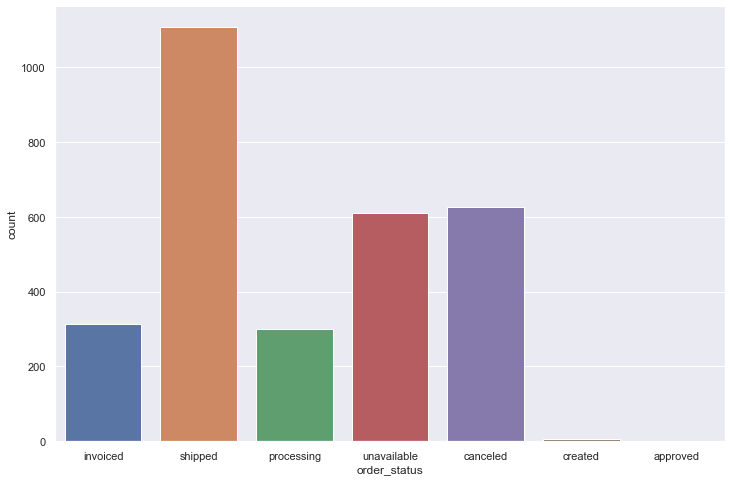

In [32]:
sns.set_theme(style="darkgrid")
sns.countplot(data=non_delivered_orders, x='order_status')

___

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Переделать, нужно смерджить с заказами

In [72]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,0


In [26]:
items = items.assign(weekday = items.shipping_limit_date.dt.weekday)

In [27]:
most_buyable_weekday = items.groupby(['product_id', 'weekday']) \
                            .agg({'product_id':'count'}) \
                            .rename(columns={'product_id':'weekday_count'}) \
                            .reset_index() \
                            .sort_values('weekday_count', ascending=False) \
                            .drop_duplicates(['product_id'])

In [29]:
most_buyable_weekday

,product_id,weekday,weekday_count
14850,422879e10f46682990de24d770e7f83d,3,159
38323,aca2eb7d00ea1a7b8ebd4e68314663af,4,149
12680,389d119b48cf3043d311335e499d9c6b,3,145
34119,99a4788cb24856965c36a24e339b6058,3,141
12177,368c6c730842d78016ad823897a372db,3,131
...,...,...,...
22685,655427924aa82cda2749c647becca121,1,1
22686,6557070af155fe4cc5820b0e123ecdf8,1,1
22687,65586e7ecd256d15d4360a6854d15b14,3,1
22688,65607db9823444a6ba5b7a82431e4502,2,1


<AxesSubplot:xlabel='weekday', ylabel='weekday_count'>

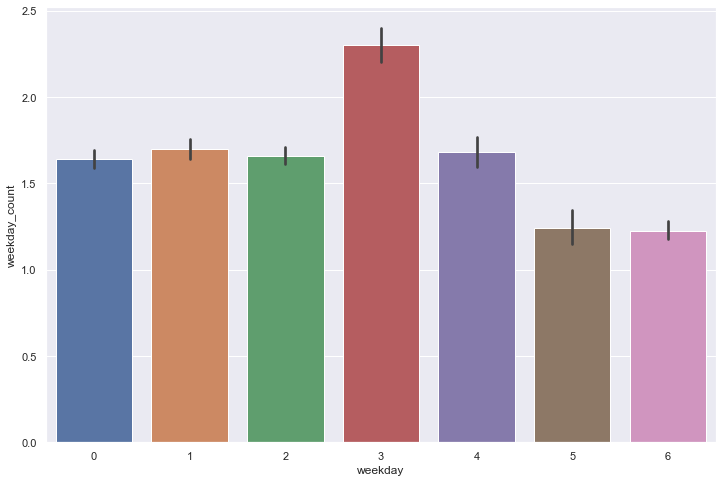

In [30]:
sns.barplot(x='weekday', y='weekday_count', data=most_buyable_weekday)

____

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

___

In [33]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


В таблице есть несколько пропущенных значений в столбце order_approved_at, хотя заказы были доставлены клиентам.  
Можно предположить, что произошел сбой, и время оплаты не подтянулось для данных заказов.  
Дабы их не терять, можно проставить дату оплаты исходя из средней дельты между временем создания заказа и его оплаты.

In [34]:
customer_orders[customer_orders.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5257,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP
16320,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,91efb7fcabc17925099dced52435837f,93548,novo hamburgo,RS
18745,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP
22316,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE
22804,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ
26383,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP
37716,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP
38744,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP
47658,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG
60798,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG


In [35]:
mean_delta = (customer_orders.order_approved_at - customer_orders.order_purchase_timestamp).mean()
mean_delta

Timedelta('0 days 10:18:56.194893434')

In [36]:
# Заполняем пропушенные значения
customer_orders.order_approved_at.fillna(customer_orders.order_purchase_timestamp + mean_delta, inplace=True)

In [37]:
# Проверяем, что средняя дельта не поменялась
(customer_orders.order_approved_at - customer_orders.order_purchase_timestamp).mean() == mean_delta

True

In [38]:
# Проверяем, что пропущенных значений нет
customer_orders.order_approved_at.isna().value_counts()

False    97888
Name: order_approved_at, dtype: int64

In [39]:
# Фиксируем количество уникалных пользователей
customer_orders.customer_unique_id.nunique()

94688

In [40]:
customer_orders_count = customer_orders.groupby(['customer_unique_id', 'order_approved_at'], as_index=False) \
                                       .agg({'order_id':'count'})

In [41]:
customer_orders_count.head()

,customer_unique_id,order_approved_at,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1


In [42]:
# Проверяем, что ничего не потеряли
customer_orders_count.customer_unique_id.nunique()

94688

In [43]:
# Добавляем столбец с количеством недель в месяце
customer_orders_count = customer_orders_count.assign(weeks_in_month=customer_orders_count.order_approved_at. \
                                                                        dt.daysinmonth / 7)

In [44]:
# Переводим дату покупки в формат ГГ-ММ
customer_orders_count.order_approved_at = pd.to_datetime(customer_orders_count.order_approved_at).dt.to_period('M')

In [45]:
customer_orders_count

,customer_unique_id,order_approved_at,order_id,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714
...,...,...,...,...
97799,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.285714
97800,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571
97801,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000
97802,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571


In [46]:
# Группируем по пользователю, считаем количество покупок
customer_orders_count = customer_orders_count.groupby(['customer_unique_id', 'order_approved_at', 'weeks_in_month']) \
                                            .agg({'order_id':'sum'}) \
                                            .rename(columns={'order_id':'orders_count'}) \
                                            .reset_index()

In [47]:
# Считаем среднее
customer_orders_count = customer_orders_count \
        .assign(monthly_mean_of_purchase_by_week = customer_orders_count.orders_count / customer_orders_count.weeks_in_month)

In [48]:
customer_orders_count.head()

,customer_unique_id,order_approved_at,weeks_in_month,orders_count,monthly_mean_of_purchase_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333


In [49]:
# Еще одна проверка
customer_orders_count.customer_unique_id.nunique()

94688

In [50]:
customer_orders_count.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"')

,customer_unique_id,order_approved_at,weeks_in_month,orders_count,monthly_mean_of_purchase_by_week
53198,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05,4.428571,1,0.225806
53199,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,4.285714,1,0.233333
53200,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,4.428571,2,0.451613
53201,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,4.428571,1,0.225806
53202,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09,4.285714,1,0.233333
53203,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,4.428571,2,0.451613
53204,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,4.285714,1,0.233333
53205,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,4.428571,2,0.451613
53206,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,4.428571,2,0.451613
53207,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,4.428571,3,0.677419


_____

### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [51]:
# Смотрим на временной диапазон, с которым работаем
print(customer_orders.order_approved_at.min())
print(customer_orders.order_approved_at.max())

2016-09-15 12:16:38
2018-09-03 17:40:06


In [53]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [54]:
# Отбираем столбцы для работы
cohort_df = customer_orders[['customer_unique_id', 'order_id', 'order_status', 'order_approved_at']]

In [55]:
cohort_df

,customer_unique_id,order_id,order_status,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29
...,...,...,...,...
97883,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05
97884,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:37
97885,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:16
97886,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:21


In [56]:
# можно попроще
first_purchase = cohort_df.groupby('customer_unique_id', as_index=False) \
                            .agg({'order_approved_at':'min'}) \
                            .rename(columns={'order_approved_at':'first_purchase'})

In [57]:
cohort_df = cohort_df.merge(first_purchase, on='customer_unique_id', how='left')

In [74]:
cohort_df

,customer_unique_id,order_id,order_status,order_approved_at,first_purchase,delta,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-09-04 11:43:25,27,30
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-07-26 03:24:27,0,0
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-08 08:55:23,0,0
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-11-18 19:45:59,0,0
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-13 22:20:29,0,0
...,...,...,...,...,...,...,...
97883,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,0,0
97884,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:37,2018-02-06 13:10:37,0,0
97885,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:16,2017-08-27 15:04:16,0,0
97886,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:21,2018-01-08 21:36:21,0,0


In [60]:
cohort_df['delta'] = (cohort_df.order_approved_at - cohort_df.first_purchase).dt.days

In [61]:
start_date = cohort_df.order_approved_at.min()
end_date = cohort_df.order_approved_at.max()

In [62]:
end_date - start_date

Timedelta('718 days 05:23:28')

In [69]:
# Создаем списки с корзинами и лейблами, которые будут им присвоены
cut_labels_days = [x for x in range (30, 721, 30)]
cut_bins_days = [x for x in range (0, 721, 30)]

In [70]:
# Разделяем дельту на когорты
cohort_df['cohort'] = pd.cut(cohort_df['delta'], bins = cut_bins_days, labels=cut_labels_days)

In [73]:
# Добавляем новую категорию в столбец когорт и заменяем ей NaNы
cohort_df.cohort = cohort_df.cohort.cat.add_categories([0])

cohort_df.cohort.fillna(value=0, inplace=True)

cohort_df.cohort = cohort_df.cohort.astype(int)

In [75]:
cohort_df.order_approved_at = cohort_df.order_approved_at.dt.to_period('M')

In [76]:
cohort_df

,customer_unique_id,order_id,order_status,order_approved_at,first_purchase,delta,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10,2017-09-04 11:43:25,27,30
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07,2018-07-26 03:24:27,0,0
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08,2018-08-08 08:55:23,0,0
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11,2017-11-18 19:45:59,0,0
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02,2018-02-13 22:20:29,0,0
...,...,...,...,...,...,...,...
97883,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03,2017-03-09 09:54:05,0,0
97884,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02,2018-02-06 13:10:37,0,0
97885,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,delivered,2017-08,2017-08-27 15:04:16,0,0
97886,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,delivered,2018-01,2018-01-08 21:36:21,0,0


In [78]:
# Используем pivot, чтобы перевернуть таблицу
pivoted_cohort = cohort_df.pivot_table(index='order_approved_at', \
                                       columns='cohort', \
                                       values='customer_unique_id', \
                                       aggfunc='count')

In [79]:
pivoted_cohort

cohort,0,30,60,90,120,150,180,210,240,270,...,330,360,390,420,450,480,510,540,600,630
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,739.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,1692.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,2610.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,2313.0,15.0,6.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,3575.0,31.0,8.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,3146.0,24.0,12.0,11.0,6.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis')

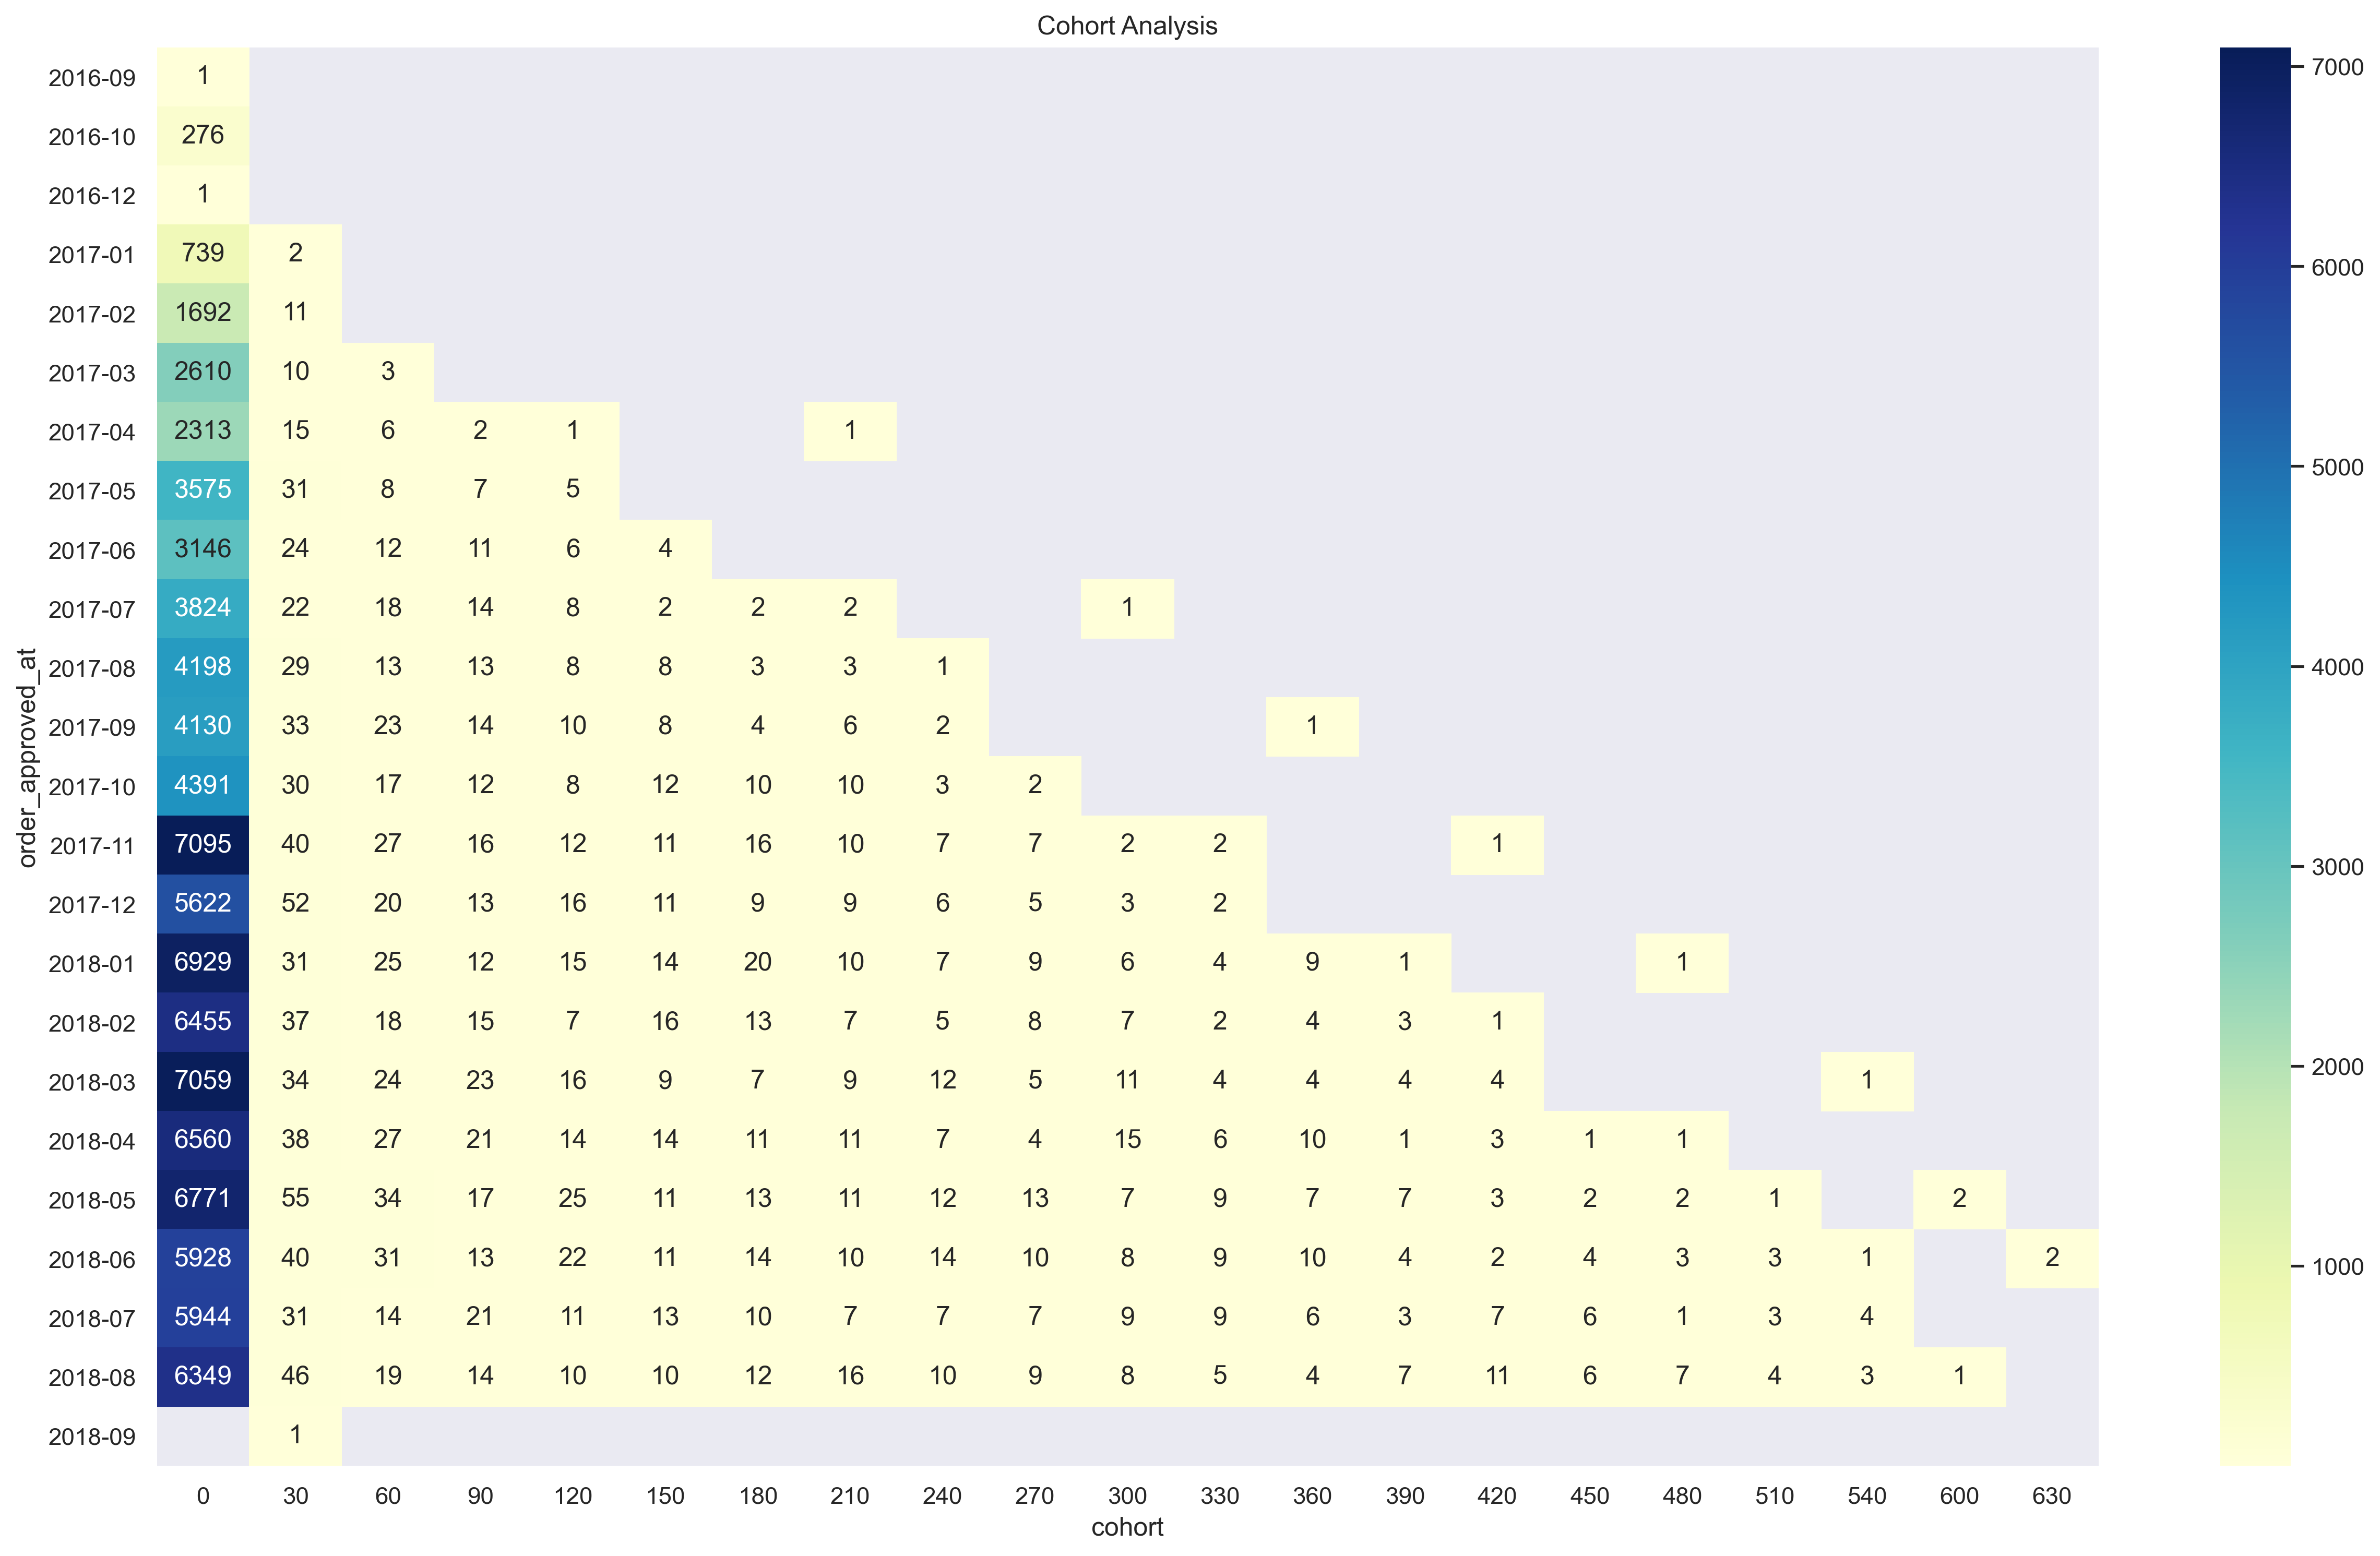

In [80]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(20, 12))
sns.heatmap(pivoted_cohort, cmap="YlGnBu", annot=True, fmt='.0f').set_title("Cohort Analysis")

In [108]:
# Когортой с самым высоким retention на третий месяц с января по декабрь являются данные пользователи
cohort_df[cohort_df.order_approved_at == '2017-11'].query('cohort == 60')

,customer_unique_id,order_id,order_status,order_approved_at,first_purchase,delta,cohort
10514,f64ec6d8dd29940264cd0bbb5ecade8a,e3e2cb00e99c9e726151683fe032019e,delivered,2017-11,2017-10-07 07:04:33,43,60
11737,2ddc001b620bd90d0f4378cfde1db887,7596db1ba623b5cb1727772fc9bf8440,delivered,2017-11,2017-10-03 03:49:25,44,60
13269,178a58ded2b9be43b90300e0e0e8e66c,21a550eeac28a30d4b59a0fd91c9cc8d,delivered,2017-11,2017-10-06 23:44:22,34,60
14503,5416f8ad5bc33953624084ebc8738307,6a7509b21939697564bb0b5aac2c8187,delivered,2017-11,2017-10-09 01:28:15,46,60
20020,9475b70c3d9add279a65672fca348944,cd62738b275de1aca104da8e9ee761a8,delivered,2017-11,2017-10-05 12:07:19,42,60
20906,4ffd7cf05f22d7a320750a2f9e73f665,da39c74861319e1493b1c77b6222958a,delivered,2017-11,2017-09-07 20:30:11,55,60
26233,52e05f52b2ccd1945aafaae6ceff7ba1,b048658d074ad2c4863ea7021ddfe990,delivered,2017-11,2017-10-23 01:14:14,32,60
28356,987fadd385777d8f27edac709bc9fb61,7cba130d7fd9cbf1fa889eaaf7c89d29,delivered,2017-11,2017-10-04 16:46:10,49,60
30258,b896655e2083a1d76b7b85df8fc86e40,dfec7411ab4ba17202e5aa72bcd3a3e1,delivered,2017-11,2017-09-26 03:56:31,49,60
34520,3f5534bf8c9378ee05b7dd684cb20e8a,838182c127d317f0eca3ea49a529146d,delivered,2017-11,2017-10-03 09:35:14,35,60


_____

### 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.

In [109]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [114]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [112]:
# Считаем стоимость всех товаров в заказах
orders_sum_price = items.groupby('order_id', as_index=False).agg({'price':'sum'})
orders_sum_price

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [116]:
# Мерджим датафрейм с заказами и клиентами к датафрейму со стоимостью заказа
rfm_df = customer_orders.merge(orders_sum_price, on='order_id', how='left')
rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90


In [118]:
# Оставляем только необходимые столбцы
rfm_df = rfm_df[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]
rfm_df

,customer_unique_id,order_id,order_approved_at,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,19.90
...,...,...,...,...
97883,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,72.00
97884,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,174.90
97885,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,205.99
97886,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,359.98


In [123]:
rfm_df.isna().value_counts()

customer_unique_id  order_id  order_approved_at  price
False               False     False              False    97887
dtype: int64

In [121]:
rfm_df[rfm_df['price'].isna()]

,customer_unique_id,order_id,order_approved_at,price
22901,f15a952dfc52308d0361288fbf42c7b3,a68ce1686d536ca72bd2dadc4b8671e5,2016-10-07 03:11:22,NaN


In [122]:
# Удаляем один заказ с пропущенной стоимостью
rfm_df.drop(rfm_df[rfm_df['price'].isna()].index, inplace=True)

In [138]:
# Оставляем для каждого клиента дату последней покупки, количество заказов и общую стоимость заказов
rfm_df_ = rfm_df.groupby('customer_unique_id', as_index=False).agg({'order_approved_at':'max', \
                                                                    'order_id':'count', \
                                                                    'price':'sum'})
rfm_df_

,customer_unique_id,order_approved_at,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,180.00
...,...,...,...,...
94682,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,1,1570.00
94683,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,1,64.89
94684,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,1,89.90
94685,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,1,115.00


In [139]:
# Добавляем столбец с текущей датой. Так как данные достаточно старые - берем самую позднюю дату покупки + 1 день
rfm_df_['current_date'] = rfm_df_.order_approved_at.max() + timedelta(days=1)

rfm_df_.current_date      = rfm_df_.current_date.dt.date
rfm_df_.order_approved_at = rfm_df_.order_approved_at.dt.date

In [143]:
# Создаем столбец с дельтой текущей даты и даты каждого заказа (для дальнейшей оценки "свежести" клиента)
rfm_df_['delta'] = rfm_df_.current_date - rfm_df_.order_approved_at
rfm_df_.delta    = rfm_df_.delta.dt.days

In [146]:
# Фиксируем значения квантилей каждого признака
r_q = rfm_df_.delta.   quantile([0.333, 0.666]).to_list()
f_q = rfm_df_.order_id.quantile([0.333, 0.666]).to_list()
m_q = rfm_df_.price.   quantile([0.333, 0.666]).to_list()
print('Recency quantiles', r_q)
print('Frequency quantiles', f_q)
print('Monetary quantiles', m_q)

Recency quantiles [154.0, 295.0]
Frequency quantiles [1.0, 1.0]
Monetary quantiles [58.9, 127.9]


In [178]:
# Разделение на квантили метрики frequency не имеет толка, так как почти 97% пользователей совершили одну покупку.
# Будем считать, что frequency = 1, когда количество покупок равно 1; 
#                    frequency = 2, когда количество покупок равно 2;
#                    frequency = 3, когда количество покупок строго больше 2
rfm_df_.order_id.value_counts()

1     91815
2      2637
3       187
4        29
5         9
6         5
7         3
9         1
16        1
Name: order_id, dtype: int64

In [148]:
# Создаем столбцы под каждую метрику
rfm_df_['R'] = np.nan
rfm_df_['F'] = np.nan
rfm_df_['M'] = np.nan

In [160]:
# Заполняем метрку R
for i in tqdm(range(len(rfm_df_.delta))):
    if rfm_df_.delta[i] < r_q[0]:
        rfm_df_.R[i] = 3
    elif r_q[0] < rfm_df_.delta[i] < r_q[1]:
        rfm_df_.R[i] = 2
    else:
        rfm_df_.R[i] = 1

100%|██████████████████████████████████████████████████████████████████████████| 94687/94687 [00:38<00:00, 2457.97it/s]


In [161]:
# Заполняем метрку F
for i in tqdm(range(len(rfm_df_.order_id))):
    if rfm_df_.order_id[i] < 2:
        rfm_df_.F[i] = 1
    elif rfm_df_.order_id[i] == 2:
        rfm_df_.F[i] = 2
    else:
        rfm_df_.F[i] = 3

100%|██████████████████████████████████████████████████████████████████████████| 94687/94687 [00:36<00:00, 2622.01it/s]


In [162]:
# Заполняем метрку M
for i in tqdm(range(len(rfm_df_.price))):
    if rfm_df_.price[i] < m_q[0]:
        rfm_df_.M[i] = 1
    elif m_q[0] < rfm_df_.price[i] < m_q[1]:
        rfm_df_.M[i] = 2
    else:
        rfm_df_.M[i] = 3

100%|██████████████████████████████████████████████████████████████████████████| 94687/94687 [00:37<00:00, 2552.83it/s]


In [168]:
# Схлапываем метрики в одну
rfm_df_.R = rfm_df_.R.astype(int).astype(str)
rfm_df_.F = rfm_df_.F.astype(int).astype(str)
rfm_df_.M = rfm_df_.M.astype(int).astype(str)
rfm_df_['RFM'] = rfm_df_.R + rfm_df_.F + rfm_df_.M

In [179]:
rfm_df_

,customer_unique_id,order_approved_at,order_id,price,current_date,delta,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,2018-09-04,117,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,2018-09-04,120,3,1,1,311
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,2018-09-04,543,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,2018-09-04,327,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,2018-09-04,294,2,1,3,213
...,...,...,...,...,...,...,...,...,...,...
94682,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,2018-09-04,453,1,1,3,113
94683,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,2018-09-04,268,2,1,2,212
94684,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,2018-09-04,574,1,1,2,112
94685,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00,2018-09-04,125,3,1,2,312


### Что означают метрики?
> __Recency__
1. Пользователь совершил покупку больше 295 дней назад.
2. Пользователь совершил покупку от 154 до 295 дней назад.
3. Пользователь совершил покупку менее 154 дней назад.  

> __Frequency__
1. Пользователь совершил одну покупку.
2. Пользователь совершил две покупки.
3. Пользователь совершил более двух покупок.  

> __Monetary__
1. Пользователь совершил покупку с чеком ниже 58,9.
2. Пользователь совершил покупку с чеком от 58,9 до 127,9.
3. Пользователь совершил покупку с чеком более 127,9.

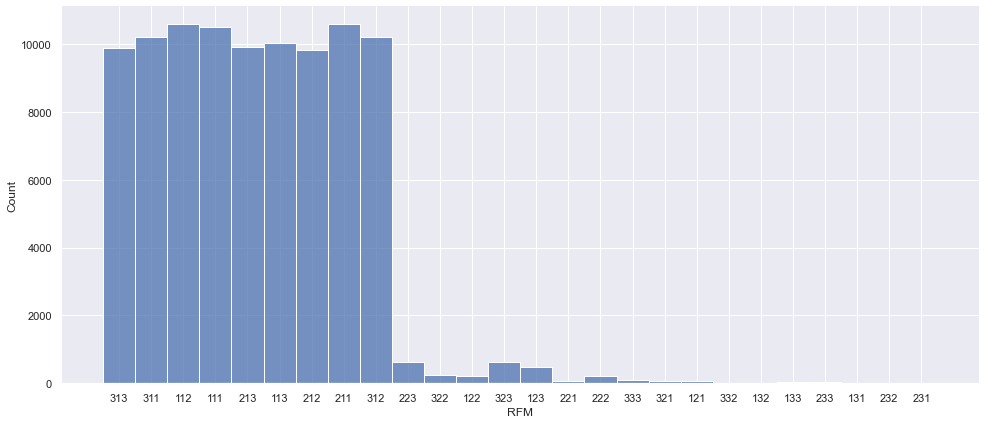

In [192]:
sns.displot(rfm_df_.RFM, height=6.0, aspect=2.3)

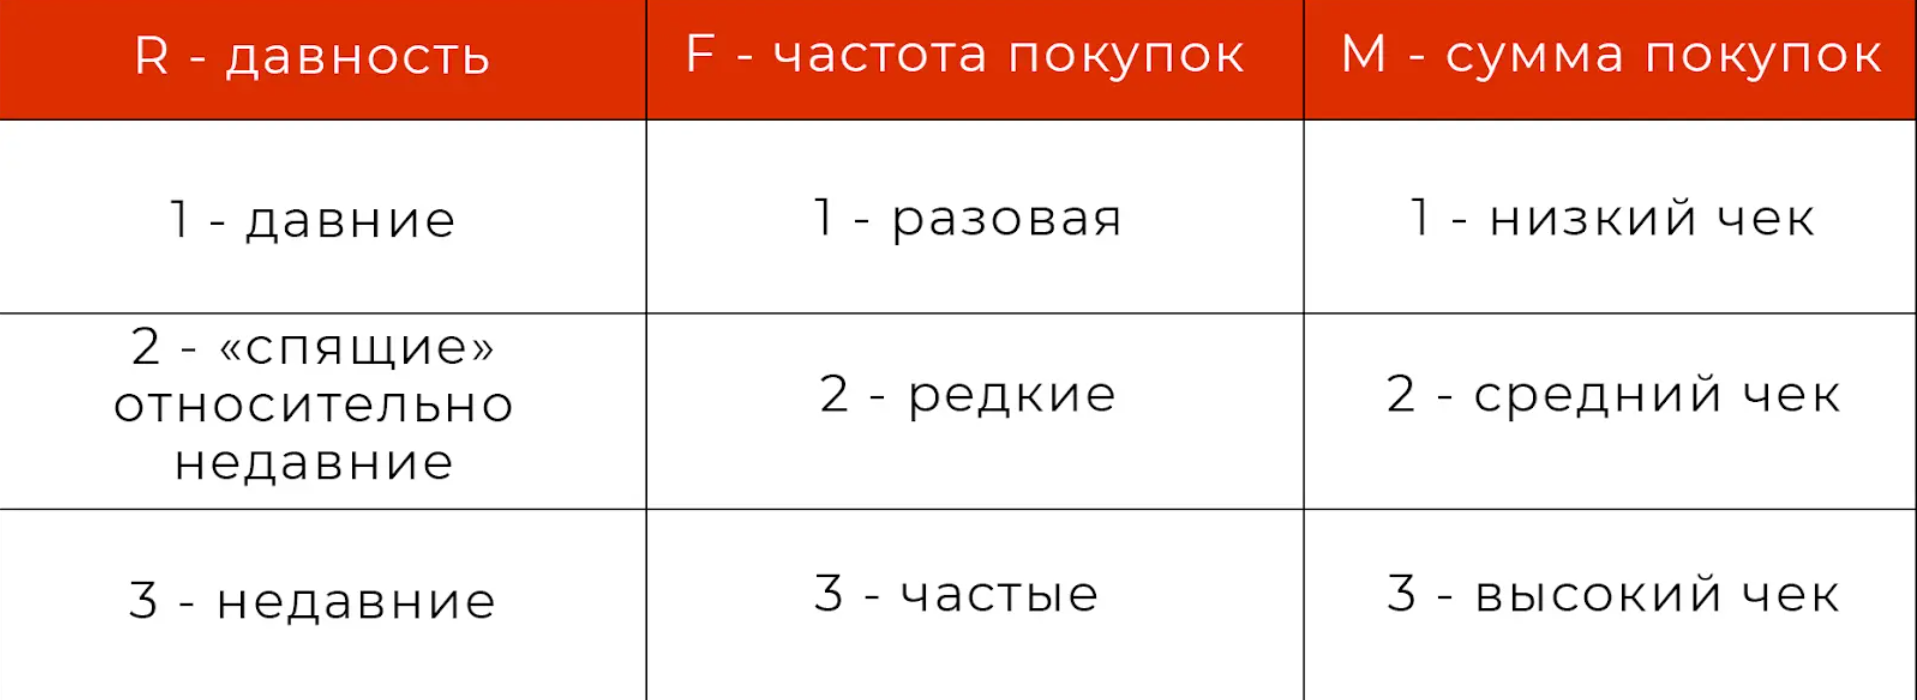

### Наиболее крупные RFM сегменты:
- _313, 311, 312_ - клиенты, которые пришли недавно. Вне зависимости от их чека, стоит стимулировать их на следующую покупку.
- _213, 212, 211_ - клиенты, совершившие покупку относительно недавно, возможно стоит напомнить им о нашем существовании.
- _112, 111, 113_ - клиенты, совершившие покупку очень давно и один раз, скорее всего они уже потеряны для нас.  

### Сегменты меньшего объема:
- _223, 222_ - относительно недавние клиенты, совершившие две покупки(средний и высокий чек).
- _322, 323_ - клиенты, недавно совершившие две покупки(средний и высокий чек). Предполагаю, что это наиболее лояльные клиенты.
- _122, 123_ - клиенты, давно совершившие две покупки(средний и высокий чек). Лояльные клиенты на грани ухода.